# Predicting House Prices Using Linear Regression and Elastic Net

# Project Overview

This project develops a machine learning model to predict house prices using historical real estate data. Accurate house price prediction is valuable for buyers, sellers, real estate agents, and companies, as it helps reduce manual effort and supports better decision-making in the real estate market.

The task is formulated as a regression problem, where Linear Regression and Elastic Net models are trained and evaluated. The performance of both models is compared using standard regression metrics such as Root Mean Squared Error (RMSE) and R² score.

The dataset used in this project is sourced from Kaggle and contains 500 samples with 11 original features related to real estate properties. Based on domain knowledge, two additional features were engineered from the original features to improve model performance. The dataset is clean and requires minimal preprocessing, making it suitable for a beginner-friendly, end-to-end machine learning project.

Tech stack: Python, pandas, matplotlib, Seaborn, scikit-learn - LinearRegression, ElasticNet, GridsearchCV, Pipeline

# Environment Setup

## Library Imports

In [1]:
# Import Libraries  
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np

# Data Loading
Source: https://www.kaggle.com/datasets/oxcolaa/real-estate-dataset/data

In [2]:
import os
import pandas as pd

DATA_PATH = os.path.join("data", "real_estate_dataset.csv")
df_raw = pd.read_csv(DATA_PATH)

## Train-Test Split 

    df_train_raw: raw training data
    df_test_raw: raw test data 

In [3]:
# Test train split
from sklearn.model_selection import train_test_split
df_train_raw, df_test_raw = train_test_split(df_raw, test_size=0.2, random_state=42)
print('Length of Training data',len(df_train_raw))
print('Length of Test',len(df_test_raw))

Length of Training data 400
Length of Test 100


# Exploratory Data Analysis (EDA)

### Copy of a raw training dataset for EDA
    df_train_eda : copy of a raw training data used for EDA
    

In [4]:
df_train_eda = df_train_raw.copy() 

## Statistics

In [5]:
df_train_eda.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
249,250,263.252364,3,3,1,1902,0,0,16,3.119840,1.212098,547951.736471
433,434,75.280669,5,1,3,1968,0,1,16,4.994318,13.487993,595883.515258
19,20,122.807285,5,2,3,1998,1,1,28,7.769280,8.294717,750687.619856
322,323,215.049344,5,1,3,1992,0,0,19,9.789575,15.536067,747398.279784
332,333,53.598372,1,1,1,1961,1,1,39,6.307005,15.611121,377060.003967


In [6]:
df_train_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 249 to 102
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  400 non-null    int64  
 1   Square_Feet         400 non-null    float64
 2   Num_Bedrooms        400 non-null    int64  
 3   Num_Bathrooms       400 non-null    int64  
 4   Num_Floors          400 non-null    int64  
 5   Year_Built          400 non-null    int64  
 6   Has_Garden          400 non-null    int64  
 7   Has_Pool            400 non-null    int64  
 8   Garage_Size         400 non-null    int64  
 9   Location_Score      400 non-null    float64
 10  Distance_to_Center  400 non-null    float64
 11  Price               400 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 40.6 KB


In [7]:
df_train_eda.describe()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,249.027500,175.953566,2.995000,1.987500,1.982500,1958.382500,0.527500,0.490000,30.280000,5.195828,10.398861,588050.030216
std,140.580382,75.003684,1.454394,0.814864,0.805491,35.856176,0.499868,0.500526,11.527959,2.903134,5.614279,121478.322035
min,2.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,291630.925913
25%,132.500000,110.863826,2.000000,1.000000,1.000000,1926.750000,0.000000,0.000000,21.000000,2.689764,5.692227,506838.778209
50%,246.500000,179.857330,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.249024,10.973750,582544.762509
75%,368.250000,244.319652,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.815544,15.072590,670420.485704
max,500.000000,297.626286,5.000000,3.000000,3.000000,2020.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


In [8]:
print(df_train_eda.isnull().sum()) # missing values

ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64


In [9]:
# Check of redundant features
low_variance = df_train_eda.describe().loc['std'].sort_values()
print("Low variance features:\n", low_variance.head())

Low variance features:
 Has_Garden       0.499868
Has_Pool         0.500526
Num_Floors       0.805491
Num_Bathrooms    0.814864
Num_Bedrooms     1.454394
Name: std, dtype: float64


In [10]:
# Check skew
df_train_eda.skew()

ID                    0.019859
Square_Feet          -0.032967
Num_Bedrooms          0.033291
Num_Bathrooms         0.022978
Num_Floors            0.031777
Year_Built            0.023987
Has_Garden           -0.110582
Has_Pool              0.040159
Garage_Size          -0.077946
Location_Score       -0.087651
Distance_to_Center   -0.164606
Price                 0.251922
dtype: float64

## Visualizations

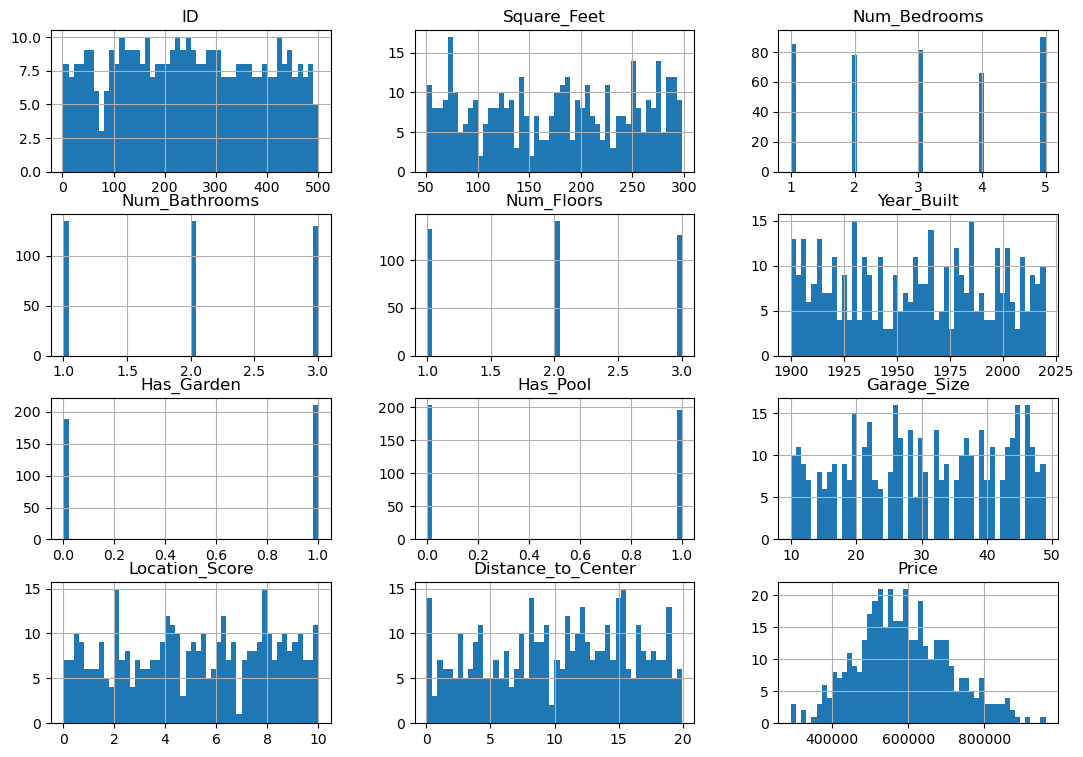

In [11]:
#fig, axes = plt.subplots(4, 3, figsize=(15, 15))
df_train_eda.hist(bins=50, figsize=(13,9)) 
plt.show()

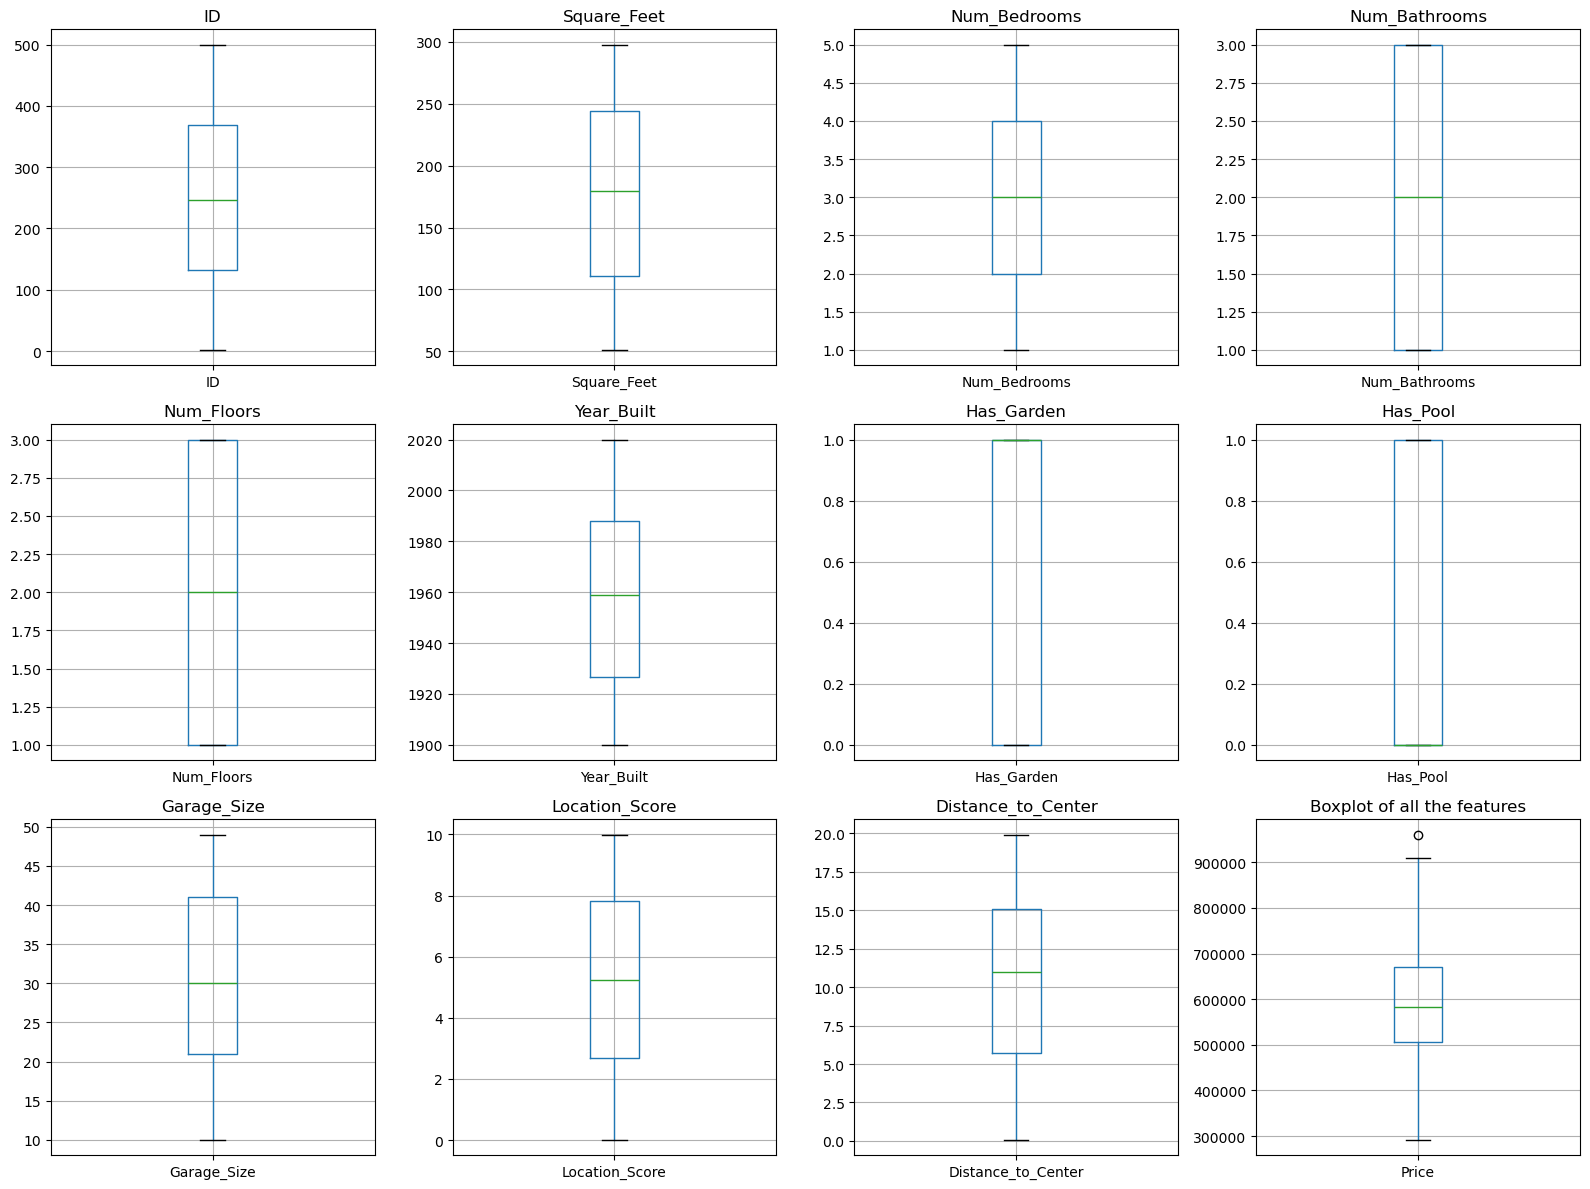

In [12]:
numeric_cols = df_train_eda.select_dtypes(include=['float64', 'int64']).columns

n = len(numeric_cols)
cols = 4                                 # number of plots per row
rows = math.ceil(n / cols)               # rows needed

plt.figure(figsize=(4*cols, 4*rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    df_train_eda.boxplot(column=col)
    plt.title(col)
plt.title('Boxplot of all the features')
plt.tight_layout()
plt.show()

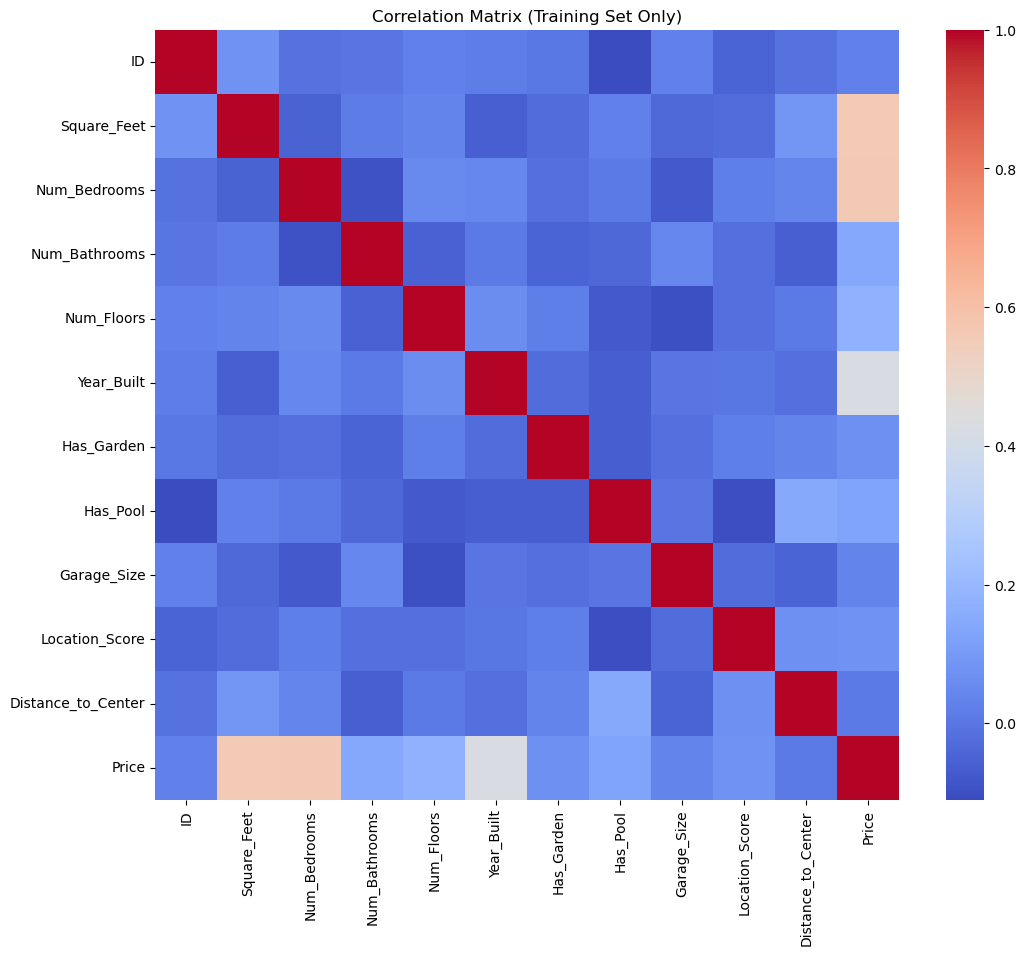

In [13]:
# Check of Correlation with Price
corr_matrix=df_train_eda.corr()
corr_matrix['Price'].sort_values(ascending=False)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix (Training Set Only)")
plt.show()

## Feature Exploration

In [14]:
## Create 2 new features
df_train_eda['Bedrooms_per_sqft']= df_train_eda['Num_Bedrooms']/ df_train_eda['Square_Feet']
df_train_eda['Bathrooms_per_bedroom']=df_train_eda['Num_Bathrooms']/ df_train_eda['Num_Bedrooms']

#### Visualize 2 features boxplot and histogram

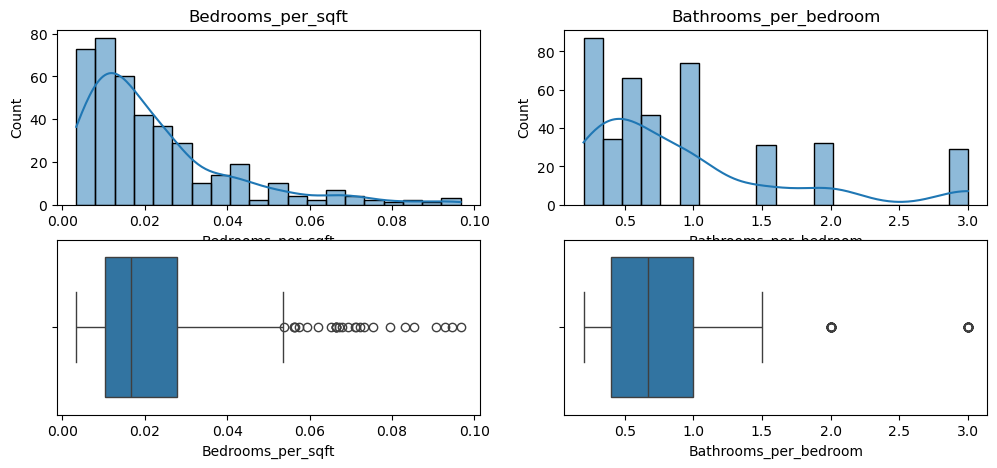

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))
sns.histplot(data=df_train_eda, x="Bedrooms_per_sqft", bins=20, kde=True, ax = axes[0,0])
axes[0,0].set_title("Bedrooms_per_sqft")

sns.histplot(data=df_train_eda, x="Bathrooms_per_bedroom", bins=20, kde=True, ax= axes[0,1])
axes[0,1].set_title("Bathrooms_per_bedroom")

sns.boxplot(data=df_train_eda, x="Bedrooms_per_sqft", ax = axes[1,0])
#axes[1,0].set_title("Bedrooms_per_sqft")

sns.boxplot(data=df_train_eda, x="Bathrooms_per_bedroom", ax= axes[1,1])
#axes[1,1].set_title("Bathrooms_per_bedroom")

#plt.tight_layout()
plt.show()

In [16]:
# Check Skew
print('Skew of feature - Bedrooms_per_sqft is: ' , df_train_eda["Bedrooms_per_sqft"].skew())
print('Skew of feature - Bathrooms_per_bedroom is: ' , df_train_eda["Bathrooms_per_bedroom"].skew())

Skew of feature - Bedrooms_per_sqft is:  1.699540020035699
Skew of feature - Bathrooms_per_bedroom is:  1.4549570735448063


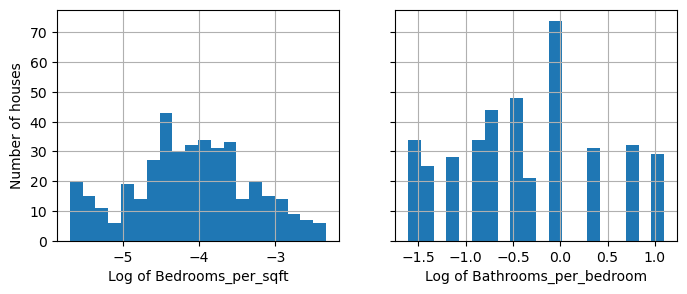

In [17]:
# Histogram after - Log transform of the new features: 
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df_train_eda["Bedrooms_per_sqft"].apply(np.log).hist(ax=axs[0], bins=20)
df_train_eda["Bathrooms_per_bedroom"].apply(np.log).hist(ax=axs[1], bins=20)
axs[0].set_xlabel("Log of Bedrooms_per_sqft")
axs[1].set_xlabel("Log of Bathrooms_per_bedroom")
axs[0].set_ylabel("Number of houses")
#save_fig("long_tail_plot")
plt.show()

In [18]:
# Check Skew after taking log transformation
print('Skew of log of feature - Bedrooms_per_sqft is: ' , df_train_eda["Bedrooms_per_sqft"].apply(np.log).skew())
print('Skew of log of feature - Bathrooms_per_bedroom is: ' , df_train_eda["Bathrooms_per_bedroom"].apply(np.log).skew())

Skew of log of feature - Bedrooms_per_sqft is:  -0.05461907303480332
Skew of log of feature - Bathrooms_per_bedroom is:  0.17084509247045754


## Summary of EDA Insights

1. Since the input dataset doesnt have any missing values or outliers, it is not necessary to clean the data for missing values.

2. Additionally, there is no need of one hot encoding due to absence of categorical features.

3. Since column 'ID' has no meaningful information, it shall be dropped.

4. After feature exploration, two new features shall be added to the data. Since the new features are not normally distributed, the log transformation is required for those. 

# Feature Engineering

### Feature Engineering Pipeline

- Input: raw feature matrix  
- Drop ID column  
- Add two engineered features  
- Column-wise preprocessing:
  - engineered features → log transform → standard scaling  
  - remaining numeric features → standard scaling  
- Output passed to final estimator  


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

### FunctionTransformers for two user defined functions 

In [20]:
# User defined function to drop a column
def drop_column(X):
    return X.copy().drop(columns=['ID'])

# Function transformer
Column_droper = FunctionTransformer(drop_column, validate=False)

In [21]:
Column_droper

FunctionTransformer(func=<function drop_column at 0x0000019BB0EB6340>)

In [22]:
# User defined function to add 2 features
def add_ratio_features(X):
    X = X.copy()
    X['Bedrooms_per_sqft']= X['Num_Bedrooms']/ X['Square_Feet']
    X['Bathrooms_per_bedroom']=X['Num_Bathrooms']/ X['Num_Bedrooms']
    return X

# Function transformer
Features_adder = FunctionTransformer(add_ratio_features, validate=False)

In [23]:
Features_adder

FunctionTransformer(func=<function add_ratio_features at 0x0000019BB0EB6B60>)

### ColumnTransformer for log and standard scaling

In [24]:
log_cols = ["Bedrooms_per_sqft", "Bathrooms_per_bedroom"]
def select_log_cols(X):
    # only return columns that exist at that moment
    return [c for c in log_cols if c in X.columns]

def select_num_cols_nonlog(X):
    # numeric columns except the log cols (and only those that exist)
    num_cols = X.select_dtypes(include="number").columns.tolist()
    log_cols = set(select_log_cols(X))
    return [c for c in num_cols if c not in log_cols]    
            
#    print('Columns for log transformation: ', log_cols)
#    print('Columns for Standard scaling transformation: ', num_cols_nonlog)


### Define a log pipeline (only applied on for new engineered features)

In [25]:
log_and_scale = Pipeline([
    ("log", FunctionTransformer(np.log1p)),
    ("scale", StandardScaler()),
])

In [26]:
log_and_scale

Pipeline(steps=[('log', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('scale', StandardScaler())])

### Define a ColumnTransformer for transformation of all columns

In [27]:
# Pre-processing
preprocessor = ColumnTransformer(
    transformers=[
        ("log_scale", log_and_scale, select_log_cols),
        ("scale_only", StandardScaler(), select_num_cols_nonlog)
    ]
)

In [28]:
preprocessor

ColumnTransformer(transformers=[('log_scale',
                                 Pipeline(steps=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scale', StandardScaler())]),
                                 <function select_log_cols at 0x0000019BB224C4A0>),
                                ('scale_only', StandardScaler(),
                                 <function select_num_cols_nonlog at 0x0000019BB224C5E0>)])

# Model Development


### Features and Lables split

In [29]:
X_train = df_train_raw.drop("Price", axis=1)
y_train = df_train_raw["Price"]
 
X_test = df_test_raw.drop("Price", axis=1)
y_test = df_test_raw["Price"]

# Print dimensions of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Print dimensions of X_test and y_test
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 11)
y_train shape: (400,)
X_test shape: (100, 11)
y_test shape: (100,)


## Linear Regression

### Build a pipeline

In [30]:
Model_lin = LinearRegression()  # Define a linear regression model

In [31]:
from sklearn.pipeline import Pipeline

pipeline_lin = Pipeline(steps=[
    ('Drop_column',Column_droper),
    ('Add_features',Features_adder),
    ('preprocessor', preprocessor),
    ('model', Model_lin)
])


In [32]:
pipeline_lin

Pipeline(steps=[('Drop_column',
                 FunctionTransformer(func=<function drop_column at 0x0000019BB0EB6340>)),
                ('Add_features',
                 FunctionTransformer(func=<function add_ratio_features at 0x0000019BB0EB6B60>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('log_scale',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  <function select_log_cols at 0x0000019BB224C4A0>),
                                                 ('scale_only',
                                                  StandardScaler(),
                                                  <function select_num_cols_nonlog at 0x0000019BB224C5E0>)])),
                ('model', LinearRegression())])

### Fit Linear regression pipeline

In [33]:
pipeline_lin.fit(X_train, y_train)

Pipeline(steps=[('Drop_column',
                 FunctionTransformer(func=<function drop_column at 0x0000019BB0EB6340>)),
                ('Add_features',
                 FunctionTransformer(func=<function add_ratio_features at 0x0000019BB0EB6B60>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('log_scale',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  <function select_log_cols at 0x0000019BB224C4A0>),
                                                 ('scale_only',
                                                  StandardScaler(),
                                                  <function select_num_cols_nonlog at 0x0000019BB224C5E0>)])),
                ('model', LinearRegression())])

### Predictions with training data

In [34]:
y_train_pred_lr = pipeline_lin.predict(X_train)

### Validation with training data

In [35]:
# Defining a function to calculate the MAE, RMSE and R2-score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics_df(y_true, y_pred, model_name=None):
    data = {
        "MAE": [mean_absolute_error(y_true, y_pred)],
        "RMSE": [np.sqrt(mean_squared_error(y_true, y_pred))],
        "R2": [r2_score(y_true, y_pred)],
#        "Mean of residuals":[r2_score(y_true, y_pred)],
    }    
    df = pd.DataFrame(data)    
    if model_name is not None:
        df.insert(0, "Model", model_name)   
    return df

### Evaluation of Linear regression model

In [36]:
metrics_lr1 = regression_metrics_df(y_train, y_train_pred_lr, model_name= 'Linear Regression')
metrics_lr1

,Model,MAE,RMSE,R2
0,Linear Regression,14679.017973,18434.541291,0.976914


### Residual analysis

In [37]:
residuals_train_lin = y_train - y_train_pred_lr
print("Mean of residuals:", residuals_train_lin.mean())

Mean of residuals: -5.675246939063072e-11


In [38]:
abs_errors = residuals_train_lin.abs()
correlation = abs_errors.corr(y_train)
print("Correlation between absolute error and true price:", correlation)

Correlation between absolute error and true price: 0.01917711069175577


## Linear Regression Model: Key Results

- Mean of residuals is effectively zero, indicating no systematic prediction bias  
- Absolute errors show near-zero correlation with true prices, suggesting errors are not price-dependent  
- Model demonstrates stable and consistent performance across the target range  
- Results indicate a good fit, with further testing on unseen data recommended  

## Cross-Validation Analysis of Linear Regression

In [39]:
from sklearn.model_selection import cross_validate

scoring = {
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error",
    "R2": "r2"
}

Lin_reg_CV_scores = cross_validate(pipeline_lin, 
                                 X_train, 
                                 y_train, 
                                 cv=5, 
                                 scoring=scoring)

# Process the dataframe to fit into metrics
Lin_reg_cv_scores_df = pd.DataFrame(Lin_reg_CV_scores).mean().to_frame(name="CV Mean").T.drop(columns=["fit_time", "score_time"])
Lin_reg_cv_scores_df["test_MAE"] = -Lin_reg_cv_scores_df["test_MAE"]
Lin_reg_cv_scores_df["test_RMSE"] = -Lin_reg_cv_scores_df["test_RMSE"]
Lin_reg_cv_scores_df = Lin_reg_cv_scores_df.rename(columns={
    "test_MAE": "MAE",
    "test_RMSE": "RMSE",
    "test_R2": "R2"
})
Lin_reg_cv_scores_df.insert(0, "Model", "Linear Regression (CV Mean)")
metrics_lr= pd.concat([metrics_lr1, Lin_reg_cv_scores_df]).drop_duplicates().reset_index(drop=True)
metrics_lr

,Model,MAE,RMSE,R2
0,Linear Regression,14679.017973,18434.541291,0.976914
1,Linear Regression (CV Mean),15142.666548,18976.955131,0.975054


## Cross-Validation Results and Interpretation

- The RMSE of cross-validation (CV) and the single Linear Regression test set are almost the same.  
- There are no signs of underfitting or overfitting.  
- Cross-validation confirms the stability and reliability of the model’s performance across different subsets of the data.


## Elastic Net Regression Approach

### Build a pipeline

In [40]:
from sklearn.linear_model import ElasticNet
Model_en = ElasticNet()

In [41]:
pipeline_en = Pipeline(steps=[
    ('Drop_column',Column_droper),
    ('Add_features',Features_adder),
    ('preprocessor', preprocessor),
    ('model', Model_en)
])

In [42]:
pipeline_en

Pipeline(steps=[('Drop_column',
                 FunctionTransformer(func=<function drop_column at 0x0000019BB0EB6340>)),
                ('Add_features',
                 FunctionTransformer(func=<function add_ratio_features at 0x0000019BB0EB6B60>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('log_scale',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  <function select_log_cols at 0x0000019BB224C4A0>),
                                                 ('scale_only',
                                                  StandardScaler(),
                                                  <function select_num_cols_nonlog at 0x0000019BB224C5E0>)])),
                ('model', ElasticNet())])

### Baseline Elastic Net Regression Model

In [43]:
pipeline_en.fit(X_train, y_train)

Pipeline(steps=[('Drop_column',
                 FunctionTransformer(func=<function drop_column at 0x0000019BB0EB6340>)),
                ('Add_features',
                 FunctionTransformer(func=<function add_ratio_features at 0x0000019BB0EB6B60>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('log_scale',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  <function select_log_cols at 0x0000019BB224C4A0>),
                                                 ('scale_only',
                                                  StandardScaler(),
                                                  <function select_num_cols_nonlog at 0x0000019BB224C5E0>)])),
                ('model', ElasticNet())])

### Predictions with training data

In [44]:
y_train_pred_en = pipeline_lin.predict(X_train)

### Metrics for an Elastic Net Model with default parameters

In [45]:
metrics_en = regression_metrics_df(y_train, y_train_pred_en, model_name= 'Elastic Net (Default)')
metrics= pd.concat([metrics_lr, metrics_en], ignore_index=True).reset_index(drop=True)
metrics

,Model,MAE,RMSE,R2
0,Linear Regression,14679.017973,18434.541291,0.976914
1,Linear Regression (CV Mean),15142.666548,18976.955131,0.975054
2,Elastic Net (Default),14679.017973,18434.541291,0.976914


### Hyperparameter Optimization for Elastic Net

In [46]:
# Define parameter grid
param_grid_en = {
    "model__alpha": [ 0.01, 0.1, 1, 10],     # strength of regularization
    "model__l1_ratio": [0.1, 0.5, 0.9],            # mix of L1 vs L2
}
param_grid_en

{'model__alpha': [0.01, 0.1, 1, 10], 'model__l1_ratio': [0.1, 0.5, 0.9]}

In [47]:
from sklearn.model_selection import GridSearchCV
grid_en= GridSearchCV(
    pipeline_en,
    param_grid_en,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=5,
    verbose=2,
    pre_dispatch='2*n_jobs',
    refit=True,
    return_train_score=True,
    error_score=np.nan
)

In [48]:
grid_en

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Drop_column',
                                        FunctionTransformer(func=<function drop_column at 0x0000019BB0EB6340>)),
                                       ('Add_features',
                                        FunctionTransformer(func=<function add_ratio_features at 0x0000019BB0EB6B60>)),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('log_scale',
                                                                         Pipeline(steps=[('log',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         <function select_log_cols at 0x0000019BB224C4A0>),
                                                                        ('scale_only',
                                                                         StandardScaler(),
                                                                         <function select_num_cols_nonlog at 0x0000019BB224C5E0>)])),
                                       ('model', ElasticNet())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.01, 0.1, 1, 10],
                         'model__l1_ratio': [0.1, 0.5, 0.9]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [49]:
grid_en.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Drop_column',
                                        FunctionTransformer(func=<function drop_column at 0x0000019BB0EB6340>)),
                                       ('Add_features',
                                        FunctionTransformer(func=<function add_ratio_features at 0x0000019BB0EB6B60>)),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('log_scale',
                                                                         Pipeline(steps=[('log',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         <function select_log_cols at 0x0000019BB224C4A0>),
                                                                        ('scale_only',
                                                                         StandardScaler(),
                                                                         <function select_num_cols_nonlog at 0x0000019BB224C5E0>)])),
                                       ('model', ElasticNet())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.01, 0.1, 1, 10],
                         'model__l1_ratio': [0.1, 0.5, 0.9]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [50]:
en_best_params= grid_en.best_params_
print(en_best_params)

{'model__alpha': 0.01, 'model__l1_ratio': 0.9}


### Elastic Net with best parameters

In [51]:
# Adjust the EN pipeline with the best parameters
pipeline_en.set_params(**en_best_params)

Pipeline(steps=[('Drop_column',
                 FunctionTransformer(func=<function drop_column at 0x0000019BB0EB6340>)),
                ('Add_features',
                 FunctionTransformer(func=<function add_ratio_features at 0x0000019BB0EB6B60>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('log_scale',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  <function select_log_cols at 0x0000019BB224C4A0>),
                                                 ('scale_only',
                                                  StandardScaler(),
                                                  <function select_num_cols_nonlog at 0x0000019BB224C5E0>)])),
                ('model', ElasticNet(alpha=0.01, l1_ratio=0.9))])

In [52]:
# fit the training data
pipeline_en.fit(X_train, y_train)
# predict
y_train_pred_en_best_params = pipeline_en.predict(X_train)

In [53]:
metrics_en_best_params = regression_metrics_df(y_train, y_train_pred_en_best_params, model_name= 'Elastic Net (Best Params)')
metrics= pd.concat([metrics, metrics_en_best_params], ignore_index=True).reset_index(drop=True)
metrics

,Model,MAE,RMSE,R2
0,Linear Regression,14679.017973,18434.541291,0.976914
1,Linear Regression (CV Mean),15142.666548,18976.955131,0.975054
2,Elastic Net (Default),14679.017973,18434.541291,0.976914
3,Elastic Net (Best Params),14674.783627,18435.311278,0.976912


## Final Model Choice and Rationale

- All evaluated linear models achieved nearly identical performance, with negligible differences in MAE, RMSE, and R².
- Linear Regression was selected as the final model due to its simplicity, interpretability, and lack of hyperparameter tuning requirements.


# Final Evaluation on Test Set

### Predictions - Test Set

In [54]:
y_test_pred = pipeline_lin.predict(X_test)

In [55]:
metrics_y_test = regression_metrics_df(y_test, y_test_pred, model_name= 'Linear Regression Test data')
metrics= pd.concat([metrics, metrics_y_test]).reset_index(drop=True).drop_duplicates()
print(metrics)

                         Model           MAE          RMSE        R2
0            Linear Regression  14679.017973  18434.541291  0.976914
1  Linear Regression (CV Mean)  15142.666548  18976.955131  0.975054
2        Elastic Net (Default)  14679.017973  18434.541291  0.976914
3    Elastic Net (Best Params)  14674.783627  18435.311278  0.976912
4  Linear Regression Test data  16532.364583  20705.031924  0.971500


###  Residual Analysis

In [56]:
# residuals
train_residuals = y_train - y_train_pred_lr
test_residuals  = y_test - y_test_pred

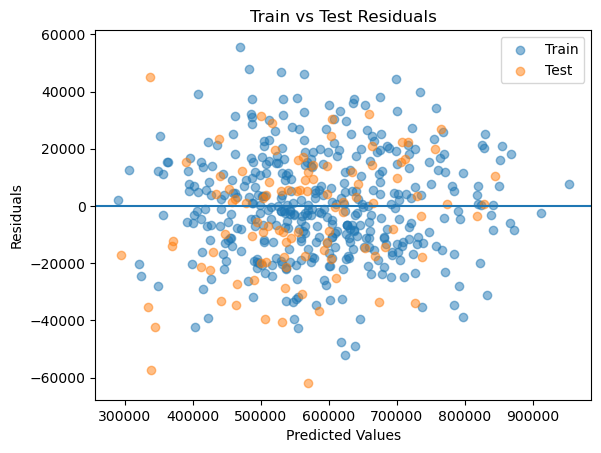

In [57]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_train_pred_lr, train_residuals, alpha=0.5, label="Train")
plt.scatter(y_test_pred, test_residuals, alpha=0.5, label="Test")
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.title("Train vs Test Residuals")
plt.show()

# Test Set Performance Summary
The final model demonstrates strong generalization on the test set, with performance metrics consistent with training and cross-validation results, indicating stable and unbiased predictions.

## Extract Feature importances 

In [58]:
#Extract the trained model
model = pipeline_lin.named_steps["model"]
model

LinearRegression()

In [59]:
model = pipeline_lin.named_steps["model"]
coefs = model.coef_.ravel()
print("n_coefs:", len(coefs))

n_coefs: 12


In [60]:
X_after_drop = pipeline_lin.named_steps["Drop_column"].transform(X_train)
X_after_feat = pipeline_lin.named_steps["Add_features"].transform(X_after_drop)

print(type(X_after_feat))
print("Columns:", getattr(X_after_feat, "columns", None))
print("Shape:", X_after_feat.shape)

<class 'pandas.core.frame.DataFrame'>
Columns: Index(['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors',
       'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score',
       'Distance_to_Center', 'Bedrooms_per_sqft', 'Bathrooms_per_bedroom'],
      dtype='object')
Shape: (400, 12)


In [61]:
log_cols = select_log_cols(X_after_feat)
num_cols = select_num_cols_nonlog(X_after_feat)

print("log_cols:", log_cols, "count:", len(log_cols))
print("num_cols:", num_cols, "count:", len(num_cols))
print("total selected:", len(log_cols) + len(num_cols))

log_cols: ['Bedrooms_per_sqft', 'Bathrooms_per_bedroom'] count: 2
num_cols: ['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score', 'Distance_to_Center'] count: 10
total selected: 12


In [62]:
feature_names = (
    [f"log_scale__{c}" for c in log_cols] +
    [f"scale_only__{c}" for c in num_cols]
)

print("n_feature_names:", len(feature_names))

n_feature_names: 12


In [63]:
assert len(feature_names) == len(coefs), f"Names={len(feature_names)} vs Coefs={len(coefs)}"

In [64]:
fi = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs,
    "importance": np.abs(coefs)
}).sort_values("importance", ascending=False)

fi.head(20)

,feature,coef,importance
2,scale_only__Square_Feet,77260.829247,77260.829247
3,scale_only__Num_Bedrooms,68606.283058,68606.283058
6,scale_only__Year_Built,54014.399222,54014.399222
4,scale_only__Num_Bathrooms,26740.101292,26740.101292
8,scale_only__Has_Pool,23235.478871,23235.478871
5,scale_only__Num_Floors,16116.639452,16116.639452
7,scale_only__Has_Garden,15268.081824,15268.081824
10,scale_only__Location_Score,14018.056614,14018.056614
9,scale_only__Garage_Size,13102.658083,13102.658083
11,scale_only__Distance_to_Center,-10428.246016,10428.246016


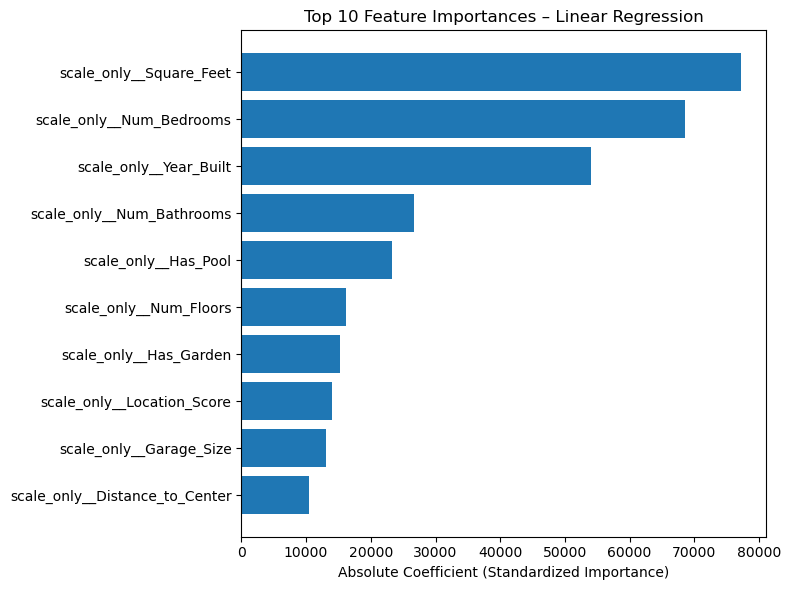

In [65]:
top_features = fi.head(10).sort_values("importance")

plt.figure(figsize=(8, 6))
plt.barh(top_features["feature"], top_features["importance"])
plt.xlabel("Absolute Coefficient (Standardized Importance)")
plt.title("Top 10 Feature Importances – Linear Regression")
plt.tight_layout()
plt.show()

## Key Insights from Feature Importance Analysis

- **Square Feet** is the strongest driver of home prices.
- **Bedrooms** and **Year Built** are major contributors to value.
- **Bathrooms** and **Pools** provide moderate price increases.
- **Floors, Gardens, Location Score, and Garage Size** have smaller positive effects.
- **Distance to Center** has the weakest influence a



# Project Summary and Conclusions

1. The project implemented an end-to-end machine learning workflow including data loading, feature engineering, and the use of pipelines for consistent preprocessing and model training.

2. Linear Regression and Elastic Net models were compared, both with and without cross-validation. Since all models achieved nearly identical performance, the simplest model (Linear Regression) was selected for better interpretability and computational efficiency.

3. Test data predictions were stable and unbiased, with error metrics remaining in a similar range to training and cross-validation results, indicating good generalization and no signs of underfitting or overfitting.

4. Feature importance analysis was performed to identify the key factors influencing property prices, providing clear insights into the most impactful property attributes and validating the model’s real-world relevance.


# Limitations

- The analysis is limited to linear relationships and may not capture complex non-linear interactions.
- Feature engineering relies on domain assumptions that may not generalize to other housing markets.
- The model was evaluated on a single train–test split; repeated holdout validation was not explored.
- The project focuses on modeling and analysis and does not include deployment or monitoring considerations.


# Future Scope

- Extend the analysis using non-linear models such as Gradient Boosting or Random Forests for comparison.
- Refactor feature engineering and preprocessing into reusable, well-documented modules.
- Validate model robustness across multiple random train–test splits.
- Explore deployment considerations such as model serialization and inference pipelines.
- Evaluate the effectiveness of engineered log-transformed features
